In [2]:
# Importing necessary libraries
import sklearn as sk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
#Q1:

data = pd.read_excel('ENB2012_data.xlsx')

In [4]:
# @title Default title text
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
data.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


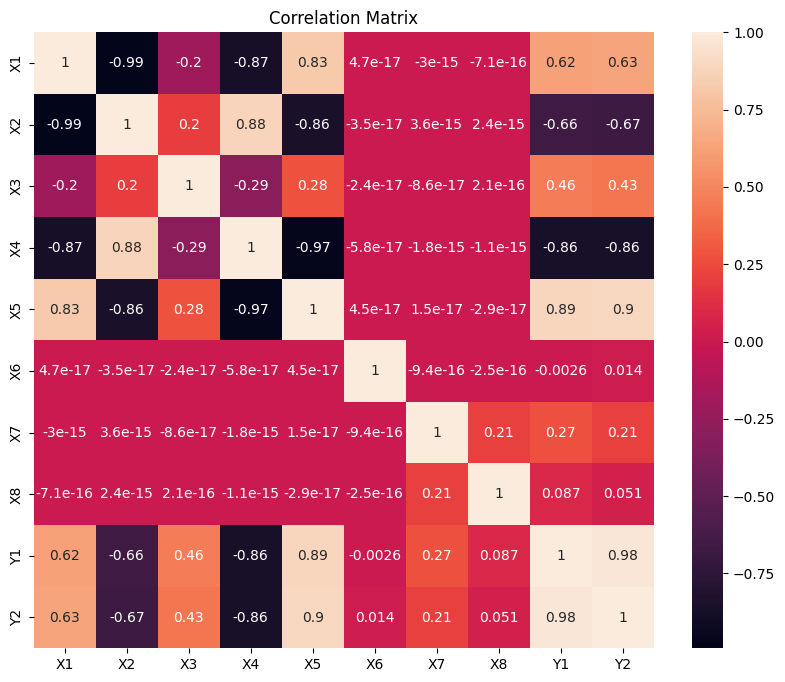

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


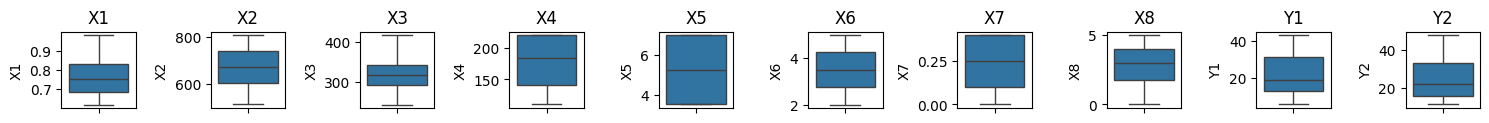

In [10]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [11]:
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [12]:
for col in numerical_columns:
    data[col] = handle_outliers(data[col])

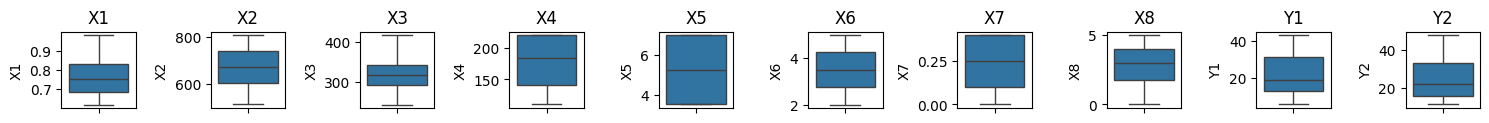

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [14]:
print("Dataset After Pre-processing:")
print(data.describe())
print("There is No outlier:")

Dataset After Pre-processing:
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000 

In [15]:
#Q2

X = data.drop(columns=['X1'])
y = data['X1']

In [16]:
#splitting data set into training into test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("\nTraining Set Shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing Set Shape (X_test, y_test):", X_test.shape, y_test.shape)




Training Set Shape (X_train, y_train): (614, 9) (614,)
Testing Set Shape (X_test, y_test): (154, 9) (154,)


In [18]:
#Q3 and Q4
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        X_transpose = X.T
        self.weights = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # ||
        return X.dot(self.weights)

In [19]:
model_scratch = LinearRegressionScratch()
model_scratch.fit(X_train.values, y_train.values)
y_pred_scratch = model_scratch.predict(X_test.values)

In [20]:
print("\nModel from Scratch:")
print("MSE:", mean_squared_error(y_test, y_pred_scratch))
print("R2 Score:", r2_score(y_test, y_pred_scratch))

# Train a linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLinear Regression with sklearn:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))



Model from Scratch:
MSE: 1.0392773104510836e+26
R2 Score: -9.146044183271135e+27

Linear Regression with sklearn:
MSE: 0.00010083673191506333
R2 Score: 0.9911259757514427


In [21]:
# Train a ridge regression model using sklearn
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression with sklearn:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))



Ridge Regression with sklearn:
MSE: 0.00010127865946469752
R2 Score: 0.9910870844097949


In [22]:
# Train a lasso regression model using sklearn
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression with sklearn:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression with sklearn:
MSE: 0.00019437795227524103
R2 Score: 0.9828939848692405


In [23]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

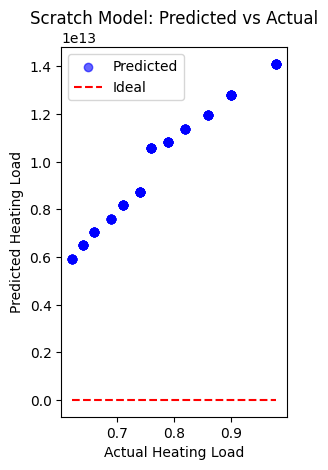

In [24]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_scratch, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.title('Scratch Model: Predicted vs Actual')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()


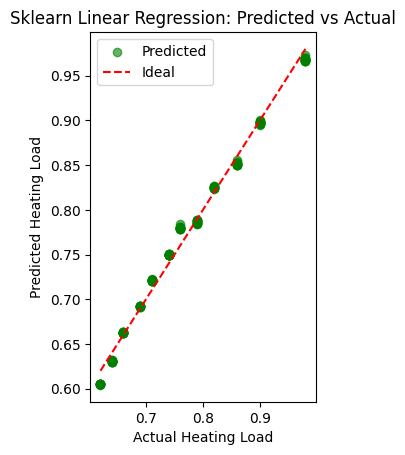

In [25]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.title('Sklearn Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.legend()

In [ ]:
#1. Wall Area Optimization
#Insight: If wall area is strongly correlated with heating load, it suggests that heat transfer through walls significantly impacts energy consumption.


# Roof Area and Insulation
#Insight: Roof area often plays a critical role in heat loss due to its exposure to external conditions.

